In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

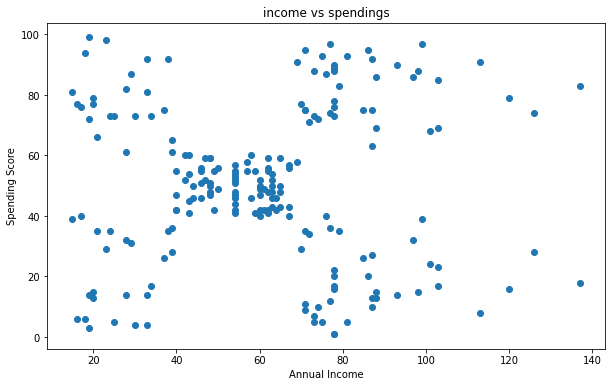

In [4]:
plt.figure(figsize = (10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("income vs spendings")
plt.show()

In [5]:
X = df.iloc[:,[3,4]].values
X.shape

(200, 2)

In [6]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [ ]:
kmeans = KMeans(n_clusters=1,init = 'random',random_state = 42)
kmeans.fit(X)

In [7]:
# elbow method

clustering_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'random',random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [8]:
clustering_score

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25095.703209997548,
 23287.318947718944,
 19710.0302716608]

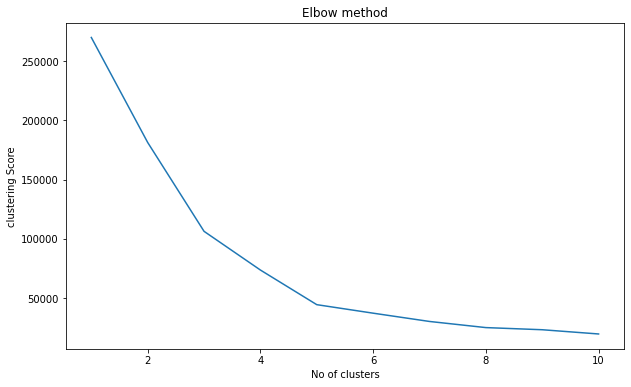

In [9]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11),clustering_score)
plt.xlabel('No of clusters')
plt.ylabel('clustering Score')
plt.title("Elbow method")
plt.show()

In [10]:
clustering_score

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25095.703209997548,
 23287.318947718944,
 19710.0302716608]

In [11]:
clustering_score[4]

44448.45544793371

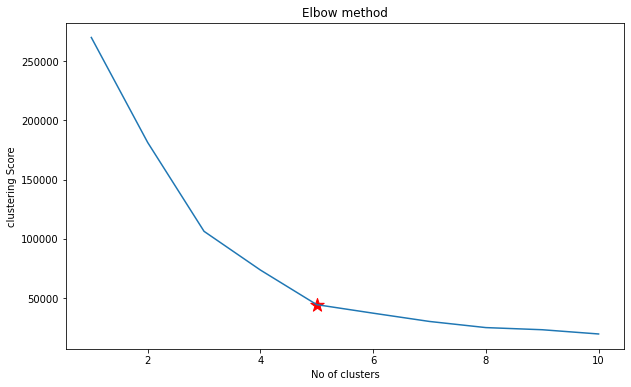

In [12]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11),clustering_score)
plt.scatter(5,clustering_score[4],s = 200,c = 'red',marker = '*')
plt.xlabel('No of clusters')
plt.ylabel('clustering Score')
plt.title("Elbow method")
plt.show()

In [ ]:
# silhoutte score : used to determine degree of speration between clusters

# coeff range is in [-1,1]
 
# if it is 0 : sample is very much closer to neighbouring cluster
# if it is 1 : sample is away from neighbouring cluster
# if it is -1 : sample is assigned to wrong cluster

In [13]:
from sklearn.metrics import silhouette_score

silhouette_score_lst = []

for i in range(2,11):
    silhouette_score_lst.append(silhouette_score(X,(KMeans(n_clusters=i).fit_predict(X))))
    

/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [14]:
silhouette_score_lst

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5270287298101395,
 0.45678411245056355,
 0.4565077334305076,
 0.45925273534781125]

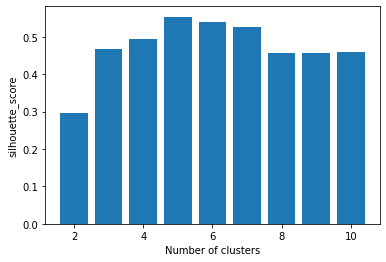

In [15]:
# plotting

k = [2,3,4,5,6,7,8,9,10]

plt.bar(k,silhouette_score_lst)
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score")
plt.show()

In [ ]:
# highest value of bar from given clusters values will be selected 

In [ ]:
# selecting number of clusters = 5

In [16]:
# set up a model
kmeans = KMeans(n_clusters=5,random_state = 42)

# fit model
kmeans.fit(X)

# predict
pred = kmeans.predict(X)
print(pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/Users/kunalshriwas/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
len(pred)

200

In [18]:
df['cluster'] = pd.DataFrame(pred,columns = ['cluster'])
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


In [ ]:
df[df['cluster']==1]

In [ ]:
df['cluster'].value_counts()

In [ ]:
# centroids of each clusters

kmeans.cluster_centers_

In [ ]:
kmeans.cluster_centers_[:,1]

In [ ]:
X[pred==1,0]

In [ ]:
X[pred==1,1]

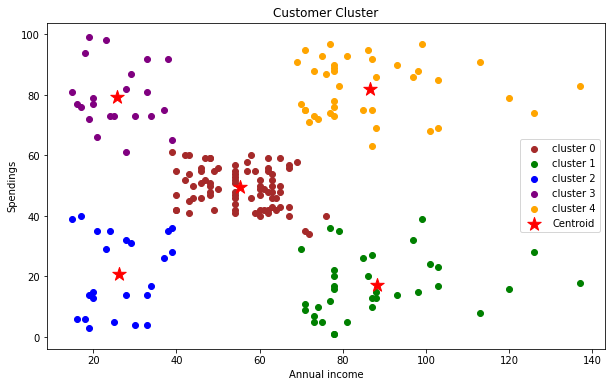

In [19]:
plt.figure(figsize = (10,6))
plt.scatter(X[pred==0,0],X[pred==0,1],c = 'brown',label = 'cluster 0')
plt.scatter(X[pred==1,0],X[pred==1,1],c = 'green',label = 'cluster 1')
plt.scatter(X[pred==2,0],X[pred==2,1],c = 'blue',label = 'cluster 2')
plt.scatter(X[pred==3,0],X[pred==3,1],c = 'purple',label = 'cluster 3')
plt.scatter(X[pred==4,0],X[pred==4,1],c = 'orange',label = 'cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200, c = 'red',label = "Centroid",marker = '*')
plt.title("Customer Cluster")
plt.xlabel("Annual income")
plt.ylabel("Spendings")
plt.legend()
plt.show()